<a href="https://colab.research.google.com/github/Hanifka/Kaggle/blob/main/Clasifikasi%20Lulus%20Telat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [79]:
df_siswa = pd.read_csv("/content/drive/MyDrive/Dataset/lomba/Dataset1_TranscriptMahasiswa.csv",sep = ';')
df_matkul = pd.read_csv("/content/drive/MyDrive/Dataset/lomba/Dataset2_EvaluasiDosenPerMK.csv",sep = ";")


In [80]:
#Fungsi Untuk cek perbedaan value
def check_val(x,y):
  w = 0
  for i in np.unique(x.values):#lengkap
      if i not in np.unique(y.values):#yang di check
        w = w + 1
        print(w,':',i)
  

def null_check(x,y):#null ceker , x nya nama data frame , y nya jumlah row table hasil
    total = x.isnull().sum().sort_values(ascending=False)
    percent = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(y)

def boxplot(column):#fungsi cek outlier
    sns.boxplot(data=df_finalis,x=df_finalis[f"{column}"])
    plt.title(f"Boxplot of  {column}")
    plt.show()

In [81]:
pd.set_option('max_rows', 99)

# Preprocessing df matkul


In [82]:
df_matkul.head()

,TAHUN,SEMESTER,MATAKULIAH,PERTANYAAN,KETERANGAN,NILAI
0,2015,1511,IS100 Management Information Systems,1,Kesiapan memberikan perkuliahan/praktikum,"3,28"
1,2015,1511,IS100 Management Information Systems,2,Upaya menyampaikan materi perkuliahan/praktik...,"3,25"
2,2015,1511,IS100 Management Information Systems,3,Sistematis dalam menyampaikan materi perkuliah...,"3,24"
3,2015,1511,IS100 Management Information Systems,4,Kemampuan memberikan contoh yang relevan dari ...,"3,30"
4,2015,1511,IS100 Management Information Systems,5,Penyampaian materi perkuliahan sesuai dengan k...,"3,27"


In [83]:
df_matkul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TAHUN       2114 non-null   int64 
 1   SEMESTER    2114 non-null   int64 
 2   MATAKULIAH  2114 non-null   object
 3   PERTANYAAN  2114 non-null   int64 
 4   KETERANGAN  2114 non-null   object
 5   NILAI       2114 non-null   object
dtypes: int64(3), object(3)
memory usage: 99.2+ KB


Dataset df_matkul terdiri dari 2115 row dan tidak terdapat row yang null hanya 
ditemukan outlier pada NILAI dan MATAKULIAH. Berikut code dan hasil output :

In [84]:
null_check(df_matkul,10)

,Total,Percent
TAHUN,0,0.0
SEMESTER,0,0.0
MATAKULIAH,0,0.0
PERTANYAAN,0,0.0
KETERANGAN,0,0.0
NILAI,0,0.0


In [85]:

df_matkul["NILAI"] = [float(str(i).replace(",", ".")) for i in df_matkul["NILAI"]]
df_matkul["KODE_MK"]=[i[:5] for i in df_matkul["MATAKULIAH"]]
df_matkul["NAMA_MK"]=[i[6:] for i in df_matkul["MATAKULIAH"]]
df_matkul["NAMA_MK"]=df_matkul["NAMA_MK"].apply(str)
df_matkul['SEMESTER'] = df_matkul['SEMESTER'].apply(str)
df_matkul.drop('MATAKULIAH', axis=1, inplace=True)
df_matkul



,TAHUN,SEMESTER,PERTANYAAN,KETERANGAN,NILAI,KODE_MK,NAMA_MK
0,2015,1511,1,Kesiapan memberikan perkuliahan/praktikum,3.28,IS100,Management Information Systems
1,2015,1511,2,Upaya menyampaikan materi perkuliahan/praktik...,3.25,IS100,Management Information Systems
2,2015,1511,3,Sistematis dalam menyampaikan materi perkuliah...,3.24,IS100,Management Information Systems
3,2015,1511,4,Kemampuan memberikan contoh yang relevan dari ...,3.30,IS100,Management Information Systems
4,2015,1511,5,Penyampaian materi perkuliahan sesuai dengan k...,3.27,IS100,Management Information Systems
...,...,...,...,...,...,...,...
2109,2018,1821,10,Pemberian tugas/kuis serta pembahasannya di kelas,3.45,IS726,Innovation in Information and Technology
2110,2018,1821,11,Kemampuan memotivasi semangat belajar mahasiswa,3.41,IS726,Innovation in Information and Technology
2111,2018,1821,12,"Kemampuan menerima kritik, saran dan pendapat",3.48,IS726,Innovation in Information and Technology
2112,2018,1821,13,Fairness dalam memberikan penilaian,3.49,IS726,Innovation in Information and Technology


In [86]:
df_matkul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TAHUN       2114 non-null   int64  
 1   SEMESTER    2114 non-null   object 
 2   PERTANYAAN  2114 non-null   int64  
 3   KETERANGAN  2114 non-null   object 
 4   NILAI       2114 non-null   float64
 5   KODE_MK     2114 non-null   object 
 6   NAMA_MK     2114 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 115.7+ KB


In [87]:
df_eval = df_matkul.groupby(
     ['SEMESTER','NAMA_MK']
 ).agg(
    
     sem_score = ('NILAI','mean'),
      
 ).reset_index()

df_eval.head(10)

,SEMESTER,NAMA_MK,sem_score
0,1511,Advanced Database,3.302857
1,1511,Advanced IS Analysis & Design,3.315000
2,1511,Algorithms and Programming,3.205714
3,1511,Business Mathematics,3.087143
4,1511,Corporate Business Processes,3.170000
5,1511,Database Administration 2,3.629286
6,1511,Database Application Development 2,3.521429
7,1511,Database Systems,2.985000
8,1511,Decision Support System,3.353571
9,1511,Enterprise Application and Systems 1,3.410714


# Preprocessing DF siswa


In [88]:
df_siswa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30870 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NIM       30870 non-null  int64  
 1   ANGKATAN  30870 non-null  int64  
 2   SEMESTER  30870 non-null  int64  
 3   KODE_MK   30870 non-null  object 
 4   NAMA_MK   30847 non-null  object 
 5   SKS       30870 non-null  int64  
 6   NILAI     30858 non-null  float64
 7   GRADE     30318 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.9+ MB


Bisa dipastikan nilai Null berarti siswa melakukan pelanggaran akademik karena semua ber grade F maka bisa di drop

Dataset yang terdiri dari 30870 row terdapat beberapa row yang null seperti 
GRADE, NAMA_MK,NILAI dan outlier pada SEMESTER dan MATAKULIAH. 
Berikut hasil output dari null checker dan contoh outlier pada data SEMESTER

In [89]:
null_check(df_siswa,10)

,Total,Percent
GRADE,552,0.017881
NAMA_MK,23,0.000745
NILAI,12,0.000389
NIM,0,0.000000
ANGKATAN,0,0.000000
SEMESTER,0,0.000000
KODE_MK,0,0.000000
SKS,0,0.000000


Pada kolom SEMESTER harus dirubah “22” menjadi 21 dengan menggunakan kode berikut :


In [90]:
#Merubah Semester Menjadi String agar bisa di manipulasi
df_siswa["SEMESTER"]=df_siswa['SEMESTER'].apply(str)
#Untuk menambahkan spasi sebagai pembeda dengan 22 yang ada ditengah ,contoh : 1221, 22 nya terletak ditengah dan itu bukan termasuk outlier
df_siswa["SEMESTER"]=df_siswa["SEMESTER"].str.ljust(5, " ")
#disini sudah saya ganti '22 ' menjadi '21 ' 
df_siswa["SEMESTER"] = [str(str(i).replace("22 ", "21 ")) for i in df_siswa["SEMESTER"]]
#Untuk Menghilangkan spasi yang ada di SEMESTER
df_siswa["SEMESTER"] = df_siswa["SEMESTER"].str.rstrip()




In [91]:

df_siswa['NAMA_MK'] = df_siswa['NAMA_MK'].astype(str)

In [92]:
df_siswa.loc[df_siswa['NAMA_MK'].isnull()]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE


In [93]:
#Mengganti Null menjadi 0
df_siswa["NILAI"].fillna("0", inplace = True)


# null pada data nama mk itu banyak yang ber kode SI863

df_siswa['NAMA_MK'] = np.where((df_siswa.KODE_MK == 'SI863'),"Tugas Akhir",df_siswa.NAMA_MK)


In [94]:
null_check(df_siswa,10)

,Total,Percent
GRADE,552,0.017881
NIM,0,0.000000
ANGKATAN,0,0.000000
SEMESTER,0,0.000000
KODE_MK,0,0.000000
NAMA_MK,0,0.000000
SKS,0,0.000000
NILAI,0,0.000000


Kolom NAMA_MK beberapa masih termerge dengan kode nya,oleh karena itu berikut ada 
code dan penjelasan untuk memisahkan datanya:

In [95]:

#List untuk menyimpan key yang harus diganti
key= []

#List untuk menyimpan value yang sudah ditransformasi
val = []

#Looping pada semua nilai di nama_mk
for i in np.unique(df_siswa.NAMA_MK):
  # disini saya pasang logic jika di index 3 = int, maka key nya saya simpan dan saya simpan juga nilai yang tertransformasi
   if i[3:4] in ['0','1','2','3','4','5','6','7','8','9']:
     key.append(i)
     val.append(i[6:])

     
# menzip list saya agar bisa jadi dictionary
zip_iterator = zip(key, val)

# membuat dictionary
a_dictionary = dict(zip_iterator)
# Transformasi data menggunakan dictionary
df_siswa = df_siswa.replace({"NAMA_MK": a_dictionary})


In [96]:
# df_siswa.loc[df_siswa["NAMA_MK"] == "nan"]

In [97]:
df_matkul["NAMA_MK"]=df_matkul['NAMA_MK'].apply(str)

In [98]:
df_siswa.drop('KODE_MK', axis=1, inplace=True)

df_forsks = df_siswa.copy()

Pada kolom SKS dilakukan transformasi data yaitu merubah nilai pada SKS yang 
bergrade D,E dan F menjadi 0 karena syarat lulus dikatakan tidak boleh memiliki grade 
tersebut.berikut code nya


In [99]:
#saya berikan sks 0 kepada grade D,E dan F karena syarat lulus tidak boleh ada grade bernilai tersebut.
df_siswa['SKS'] = np.where((df_siswa.GRADE == 'D'),0,df_siswa.SKS)
df_siswa['SKS'] = np.where((df_siswa.GRADE == 'E'),0,df_siswa.SKS)
df_siswa['SKS'] = np.where((df_siswa.GRADE == 'F'),0,df_siswa.SKS)


In [100]:
df_siswa['NILAI'] = df_siswa['NILAI'].astype(float)
df_siswa['BOBOT'] = df_siswa['NILAI']
df_siswa['GRADE']  = pd.cut(df_siswa.NILAI,[0,44.99,54.99,59.99,64.99,69.99,74.99,79.99,84.99,100],labels=["E","D","C","C+","B-","B","B+","A-","A"])
df_siswa['BOBOT']  = pd.cut(df_siswa.NILAI,[0,44.99,54.99,59.99,64.99,69.99,74.99,79.99,84.99,100],labels=[0,1.0,2.0,2.3,2.7,3.0,3.3,3.7,4])
df_siswa.head()


,NIM,ANGKATAN,SEMESTER,NAMA_MK,SKS,NILAI,GRADE,BOBOT
0,10110310002,2010,1011,Dasar-dasar Bisnis,3,57.0,C,2.0
1,10110310002,2010,1011,Matematika Bisnis,3,70.0,B,3.0
2,10110310002,2010,1011,Algoritma dan Pemrograman,4,57.0,C,2.0
3,10110310002,2010,1011,Matematika Diskrit,3,59.0,C,2.0
4,10110310002,2010,1011,Pengantar Teknologi Multimedia,3,74.0,B,3.0


karena disini nilai nan dikarena kan nilai yang 0 maka saya bisa mengisi grade dengan f dan bobot dengan 0

In [101]:
#Terjadi eror jika tidak saya ganti menjadi string terlebih dahulu
df_siswa['GRADE'] = df_siswa['GRADE'].astype(str)
df_siswa["GRADE"].fillna('F', inplace = True)
df_siswa["BOBOT"].fillna(0, inplace = True)

df_siswa['GRADE'] = pd.Categorical(df_siswa['GRADE'])

In [102]:
null_check(df_siswa,5)

,Total,Percent
NIM,0,0.0
ANGKATAN,0,0.0
SEMESTER,0,0.0
NAMA_MK,0,0.0
SKS,0,0.0


In [103]:
df_siswa.head()

,NIM,ANGKATAN,SEMESTER,NAMA_MK,SKS,NILAI,GRADE,BOBOT
0,10110310002,2010,1011,Dasar-dasar Bisnis,3,57.0,C,2.0
1,10110310002,2010,1011,Matematika Bisnis,3,70.0,B,3.0
2,10110310002,2010,1011,Algoritma dan Pemrograman,4,57.0,C,2.0
3,10110310002,2010,1011,Matematika Diskrit,3,59.0,C,2.0
4,10110310002,2010,1011,Pengantar Teknologi Multimedia,3,74.0,B,3.0


In [104]:
null_check(df_siswa,10)

,Total,Percent
NIM,0,0.0
ANGKATAN,0,0.0
SEMESTER,0,0.0
NAMA_MK,0,0.0
SKS,0,0.0
NILAI,0,0.0
GRADE,0,0.0
BOBOT,0,0.0


In [105]:
df_siswa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30870 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   NIM       30870 non-null  int64   
 1   ANGKATAN  30870 non-null  int64   
 2   SEMESTER  30870 non-null  object  
 3   NAMA_MK   30870 non-null  object  
 4   SKS       30870 non-null  int64   
 5   NILAI     30870 non-null  float64 
 6   GRADE     30870 non-null  category
 7   BOBOT     30870 non-null  category
dtypes: category(2), float64(1), int64(3), object(2)
memory usage: 1.5+ MB


In [106]:
df_siswa['NILAI'] = df_siswa['NILAI'].astype(float)

Dari kolom SEMESTER dibuatlah kolom Tahun_Ajar ,karena dari kolom tersebut 
mengandung tahun kapan semester itu digelar, berikut kode nya :

In [107]:
df_siswa.SEMESTER = df_siswa.SEMESTER.apply(pd.to_numeric)
df_siswa['Tahun_Ajar'] = df_siswa['SEMESTER']

df_siswa['Tahun_Ajar'] = pd.cut(df_siswa['SEMESTER'],[0,1023,1123,1223,1323,1423,1523,1623,1723,1823,1923],labels = ['2010', '2011','2012','2013','2014', '2015', '2016', '2017', '2018', '2019'],ordered=False)

In [108]:
df_forsks = df_forsks.drop_duplicates(subset=['NIM','SEMESTER','NAMA_MK'], keep='first')
df_siswa = df_siswa.drop_duplicates(subset=['NIM','SEMESTER','NAMA_MK'], keep='first')

#Bagian Grouping

Untuk mengetahui apakah nim tersebut lulus kita harus membuat kolom yang memenuhi 
informasi syarat lulus dibawah:


*   IPK di atas 2.5,4. Nilai IPK adalah total nilai IPS dibagi dengan total semester.
*   144 SKS.
*   Tidak ada grade D, E, dan F pada setiap mata kuliah.

Sebelum mendapatkan kolom IPS kita harus mendapatkan jumlah dari mengalikan BOBOT 
dengan SKS,tapi sks yang digunakan adalah sks dari dataset lain karena sks di df_siswa sudah 
dimanipulasi untuk menyaring grade D,E, dan Fberikut code nya :





In [109]:
df_siswa.Tahun_Ajar= df_siswa.Tahun_Ajar.astype('int')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [110]:
df_skssem = df_forsks.groupby(
     ['NIM','ANGKATAN','SEMESTER']
 ).agg(
      
      SKS = ('SKS','sum'),

).reset_index()


In [111]:
df_skssum = df_skssem.groupby(
     ['NIM','ANGKATAN']
 ).agg(
      
      SKS = ('SKS','sum'),
      SKSmean = ('SKS','mean'),
      
).reset_index()     

In [112]:
#Pengali bobot dan sks

df_siswa.BOBOT = df_siswa.BOBOT.apply(pd.to_numeric)
df_siswa.BOBOT = df_siswa.BOBOT.astype('int')
df_siswa['BOBOTXSKS'] = df_siswa.BOBOT * df_forsks.SKS

Dari sini dibuat dataset baru bernama df_final dengan mengroping data kolom 
NIM,ANGKATAN,dan SEMESTER dengan jumlah bobot kali sks per semester,jumlah sks per 
semester, mean nilai per semester , mean bobot per semester dan kapan tahun ajar sebuah
semester , lalu dilakukan proses perkalian antara hasil sks kali bobot persemester dengan SKS
persemester yang belum di manipulasi berikut codenya :


In [113]:
df_final = df_siswa.groupby(
     ['NIM','ANGKATAN','SEMESTER']
 ).agg(
      sumsksbobot = ('BOBOTXSKS','sum'),
      SKS = ('SKS','sum'),
      
      NILAI = ('NILAI','mean'),
      BOBOT = ('BOBOT','mean'),
      TAHUN = ('Tahun_Ajar',np.max),
      
    
     
     
      
 ).reset_index()

df_final["IPS"] = df_final.sumsksbobot / df_skssem.SKS

Setelah sudah mendapatkan nilai IPS,dibutuhkan total nilai IPS dan dibagi jumlah semester 
agar menjadi nilai IPK, untuk mendapatkan total IPS dilakukan gruping data NIM dan 
ANGKATAN dengan total IPS selama kuliah, nilai rataan IPS, jumlah semester,jumlah 
SKS,rataan sks per semester, rataan nilai selama kuliah, rataan bobot selama kuliah, dan berapa 
tahun mahasiswa tersebut sudah berkuliah setelah itu meansks nya juga direplace dari tabel sks 
nya belum dimanipulasi ,berikut code nya :


In [114]:
df_finalis = df_final.groupby(
     ['NIM','ANGKATAN']
 ).agg(
      # sumsksbobot = ('BOBOTXSKS','sum'),
      IPS = ('IPS','sum'),
      IPSmean = ('IPS','mean'),
      SEMESTER = ('SEMESTER','nunique'),
      SKS = ('SKS','sum'),
      SKSmean = ('SKS','mean'),
      meNILAI = ('NILAI','mean'),
      meBOBOT = ('BOBOT','mean'),
      TAHUN = ('TAHUN','nunique'),
       
 ).reset_index()

df_finalis["IPK"] = df_finalis.IPS / df_finalis.SEMESTER

In [115]:
df_finalis.loc[(df_finalis['NIM'] == 18866)]

,NIM,ANGKATAN,IPS,IPSmean,SEMESTER,SKS,SKSmean,meNILAI,meBOBOT,TAHUN,IPK


In [116]:

df_finalis.SKSmean.replace(df_skssum.SKSmean, inplace=True)

In [117]:
check_val(df_siswa.NIM,df_finalis.NIM)

In [118]:
df_finalis.head()

,NIM,ANGKATAN,IPS,IPSmean,SEMESTER,SKS,SKSmean,meNILAI,meBOBOT,TAHUN,IPK
0,8429,2015,24.765421,3.095678,8,142,17.750000,80.147321,3.101786,4,3.095678
1,8455,2015,22.727193,2.840899,8,130,16.250000,74.680804,2.859375,4,2.840899
2,8481,2015,17.714881,2.214360,8,106,13.250000,65.452381,2.224405,4,2.214360
3,8631,2015,23.252405,3.321772,7,145,20.714286,83.242063,3.314909,4,3.321772
4,8684,2015,22.830941,3.261563,7,145,20.714286,82.520181,3.267460,4,3.261563


In [119]:

# df_finalis["durasi"] = df_finalis.TAHUN - df_finalis.ANGKATAN

df_finalis.drop('IPS', axis=1, inplace=True)



df_finalis["lulusTEPAT"] = (df_finalis.IPK > 2.5) & (df_finalis.SKS >= 144) & (df_finalis.TAHUN <= 4)
df_finalis["lulus"] = (df_finalis.IPK > 2.5) & (df_finalis.SKS >= 144)
df_finalis['lulusTEPAT'] = (df_finalis['lulusTEPAT'] == True).astype(int)
df_finalis['lulus'] = (df_finalis['lulus'] == True).astype(int)
df_finalis.head()

,NIM,ANGKATAN,IPSmean,SEMESTER,SKS,SKSmean,meNILAI,meBOBOT,TAHUN,IPK,lulusTEPAT,lulus
0,8429,2015,3.095678,8,142,17.750000,80.147321,3.101786,4,3.095678,0,0
1,8455,2015,2.840899,8,130,16.250000,74.680804,2.859375,4,2.840899,0,0
2,8481,2015,2.214360,8,106,13.250000,65.452381,2.224405,4,2.214360,0,0
3,8631,2015,3.321772,7,145,20.714286,83.242063,3.314909,4,3.321772,1,1
4,8684,2015,3.261563,7,145,20.714286,82.520181,3.267460,4,3.261563,1,1


In [120]:


# df_finalis.drop('SKS', axis=1, inplace=True)

# df_finalis.drop('TAHUN', axis=1, inplace=True)


# df_finalis.drop('IPS', axis=1, inplace=True)

Disini terlihat banyak yang false, agar tidak terjadi Imbalanced data set saya akan drop nim yang memang belum waktunya untuk lulus

In [121]:
 df_finalis['lulusTEPAT'].value_counts(normalize=True)

0    0.781818
1    0.218182
Name: lulusTEPAT, dtype: float64

In [122]:
df_finalis =  df_finalis.set_index('NIM')

In [123]:
df_finalis.SKSmean.replace(df_skssum.SKSmean, inplace=True)

In [124]:
df_siswaall = df_finalis.copy()

In [125]:
df_finalis.loc[(df_finalis['ANGKATAN'] == 2016) & (df_finalis.lulus == 1)]
# df_siswa['SKS'] = np.where((df_siswa.GRADE == 'D'),0,df_siswa.SKS)

,ANGKATAN,IPSmean,SEMESTER,SKS,SKSmean,meNILAI,meBOBOT,TAHUN,IPK,lulusTEPAT,lulus
NIM,,,,,,,,,,,


Sekarang data sudah tidak terlalu imbalanced

In [126]:
predtarg = df_finalis.loc[df_finalis['ANGKATAN'] >= 2016]

df_finalis.drop(df_finalis.index[df_finalis['ANGKATAN'] >= 2016], inplace=True)


In [127]:
 df_finalis['lulusTEPAT'].value_counts(normalize=True)

0    0.612903
1    0.387097
Name: lulusTEPAT, dtype: float64

In [128]:
df_finalis.head()

,ANGKATAN,IPSmean,SEMESTER,SKS,SKSmean,meNILAI,meBOBOT,TAHUN,IPK,lulusTEPAT,lulus
NIM,,,,,,,,,,,
8429,2015,3.095678,8,142,17.750000,80.147321,3.101786,4,3.095678,0,0
8455,2015,2.840899,8,130,16.250000,74.680804,2.859375,4,2.840899,0,0
8481,2015,2.214360,8,106,13.250000,65.452381,2.224405,4,2.214360,0,0
8631,2015,3.321772,7,145,20.714286,83.242063,3.314909,4,3.321772,1,1
8684,2015,3.261563,7,145,20.714286,82.520181,3.267460,4,3.261563,1,1


In [129]:
 df_finalis.ANGKATAN =  df_finalis.ANGKATAN.astype('string')

# Exploratory Data Analysis(EDA)

In [130]:
tepatlulus = df_finalis.loc[df_finalis['lulusTEPAT'] == 1]
xtepat = df_finalis.loc[df_finalis['lulusTEPAT'] == 0]

In [131]:
y = df_finalis.lulusTEPAT


In [132]:

trypredmin = (df_finalis['IPSmean'] >= 2.772795) & (df_finalis.meNILAI >= 70.845486) & (df_finalis.meBOBOT >= 2.783503 ) & (df_finalis.SKSmean >= 4.000000)
trypredmin25 = (df_finalis['IPSmean'] >= 3.114442) & (df_finalis.meNILAI >= 77.970351) & (df_finalis.meBOBOT >= 3.121838) & (df_finalis.SKSmean >= 13.881250).astype(int)
trypredmin50 = (df_finalis['IPSmean'] >= 3.317819) & (df_finalis.meNILAI >= 81.350149) & (df_finalis.meBOBOT >= 3.325149) & (df_finalis.SKSmean >= 15.7778).astype(int)


Dari sini model saya tebukti masih memiliki score terbaik

In [133]:
df_finalis.head()

,ANGKATAN,IPSmean,SEMESTER,SKS,SKSmean,meNILAI,meBOBOT,TAHUN,IPK,lulusTEPAT,lulus
NIM,,,,,,,,,,,
8429,2015,3.095678,8,142,17.750000,80.147321,3.101786,4,3.095678,0,0
8455,2015,2.840899,8,130,16.250000,74.680804,2.859375,4,2.840899,0,0
8481,2015,2.214360,8,106,13.250000,65.452381,2.224405,4,2.214360,0,0
8631,2015,3.321772,7,145,20.714286,83.242063,3.314909,4,3.321772,1,1
8684,2015,3.261563,7,145,20.714286,82.520181,3.267460,4,3.261563,1,1


In [134]:
# y_pred

from sklearn.metrics import accuracy_score


# accuracy_score(y, y_pred)
   


In [135]:
accuracy_score(y,trypredmin.astype(int))

0.6682027649769585

In [136]:
accuracy_score(y,trypredmin25.astype(int))

0.8133640552995391

In [137]:
accuracy_score(y,trypredmin50.astype(int))

0.7557603686635944

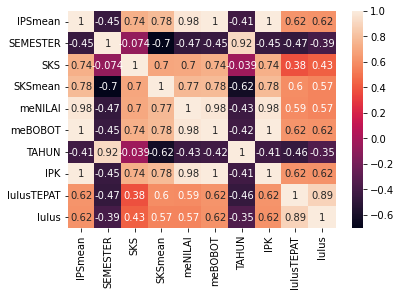

In [138]:
ax = sns.heatmap(df_finalis.corr(), annot=True)

In [139]:
!pip install -U jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Training

In [140]:

from jcopml.automl import AutoClassifier

X = df_finalis.drop(columns=['lulusTEPAT','ANGKATAN','SEMESTER','SKS','TAHUN','IPK','lulus'])
y = df_finalis.lulusTEPAT

In [141]:
# ANGKATAN	IPSmean	SEMESTER	SKS	meNILAI	meBOBOT	TAHUN	IPK	lulusTEPAT

In [142]:
# jcopml.__version__

# Auto ML dengan Randomsearchcv

In [143]:
model1 = AutoClassifier(['IPSmean','meNILAI','meBOBOT','SKSmean'],[],) 
model2 = AutoClassifier(['IPSmean','meNILAI','meBOBOT','SKSmean'],[],) 
model3 = AutoClassifier(['IPSmean','meNILAI','meBOBOT','SKSmean'],[],) 

In [144]:
model1.fit(X,y, cv=4)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
================== Best Model Info ==================
algo                      | RandomForestClassifier
algo__max_depth           | 27
algo__max_features        | 0.5045056067243832
algo__min_samples_leaf    | 1
algo__n_estimators        | 147

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | SimpleImputer(add_indicator=False, strategy='median')
numerical_scaler          | StandardScaler

=========== Score ===========
Train: 1.0
Valid: 0.9769780807270783
Test : 1.0


In [ ]:
model2.fit(X,y, algo=['rf'],cv=4,n_trial=200)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


In [ ]:


model1.plot_results()

In [ ]:
model1.mean_score_decrease()

In [ ]:
model2.plot_results()

In [ ]:
model2.mean_score_decrease()

# Melakukan Prediksi

In [ ]:
coba = model2.predict(predtarg)
predtarg['target'] = coba
predtarg.drop('lulusTEPAT', axis=1, inplace=True)
predtarg.drop('lulus', axis=1, inplace=True)


# Export Model

In [ ]:
# save_model(model, "NYOBA_Penyisihan_OutputDatCom.pkl")